<a href="https://colab.research.google.com/github/niketh0306/SE-Lab-Task--4/blob/main/SE_Lab_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

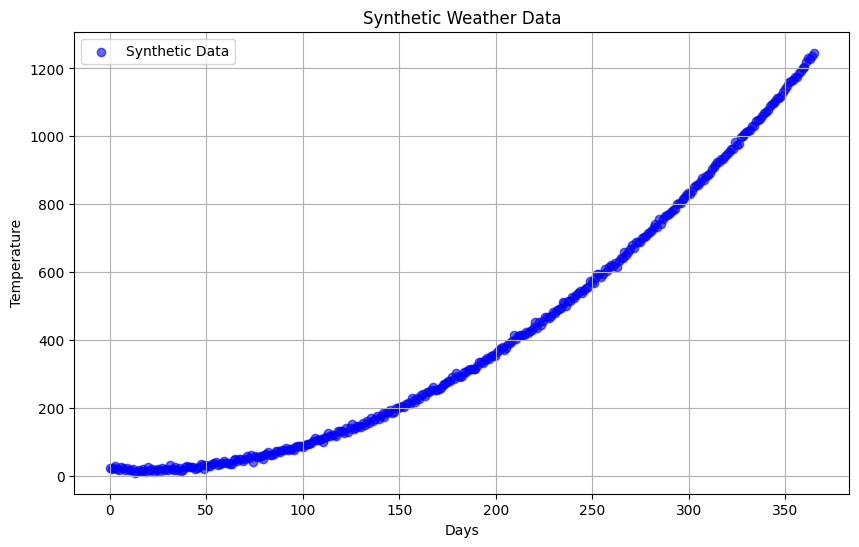

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SECTION 1: Generate synthetic weather data
np.random.seed(42)
x = np.linspace(0, 365, 365)  # Days in a year
y = 0.01 * x**2 - 0.3 * x + 20 + np.random.normal(0, 5, 365)  # Quadratic data with noise

# Normalize x for stability in gradient descent
x_normalized = (x - np.mean(x)) / np.std(x)

# Plot the synthetic weather data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Synthetic Data", color="blue", alpha=0.6)
plt.title("Synthetic Weather Data")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# SECTION 2: Initialize parameters and hyperparameters
a, b, c = 0.0, 0.0, 0.0  # Parameters for the quadratic model
learning_rate = 1e-4  # Step size for gradient descent
iterations = 10000  # Number of iterations for optimization
lambda_reg = 0.01  # Regularization strength
n = len(y)  # Number of data points

# Lists to store cost during optimization
cost_history = []

# Gradient Descent Loop
for i in range(iterations):
    # Predicted values
    y_pred = a * x_normalized**2 + b * x_normalized + c
    error = y - y_pred

    # Compute gradients with regularization
    a_gradient = (-2 / n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
    b_gradient = (-2 / n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
    c_gradient = (-2 / n) * np.sum(error) + 2 * lambda_reg * c

    # Update parameters using gradients
    a -= learning_rate * a_gradient
    b -= learning_rate * b_gradient
    c -= learning_rate * c_gradient

    # Compute cost (Mean Squared Error + Regularization Term)
    cost = np.mean(error**2) + lambda_reg * (a**2 + b**2 + c**2)
    cost_history.append(cost)

    # Print progress every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Final parameters
print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")


Iteration 0, Cost: 303529.8980669548
Iteration 1000, Cost: 156069.97710139843
Iteration 2000, Cost: 88575.92045590069
Iteration 3000, Cost: 54818.9260005489
Iteration 4000, Cost: 36338.360042263106
Iteration 5000, Cost: 25392.651093876026
Iteration 6000, Cost: 18505.858444601723
Iteration 7000, Cost: 13981.424622398385
Iteration 8000, Cost: 10915.947203256306
Iteration 9000, Cost: 8789.774190587656
Final parameters: a = 163.7919, b = 304.2182, c = 216.1544


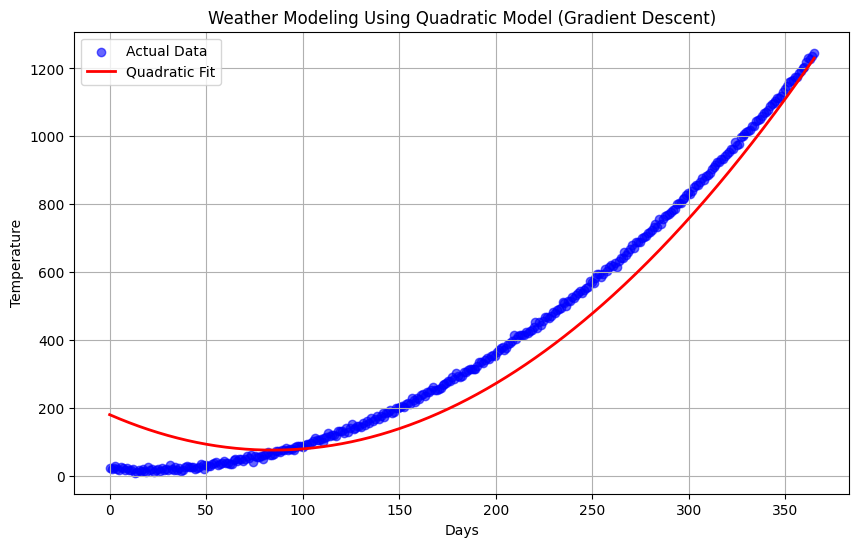

In [3]:
# SECTION 3: Visualize the quadratic model and predictions
y_final_pred = a * x_normalized**2 + b * x_normalized + c

# Plot the data and the model
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Actual Data", alpha=0.6, color="blue")
plt.plot(x, y_final_pred, label="Quadratic Fit", color="red", linewidth=2)
plt.title("Weather Modeling Using Quadratic Model (Gradient Descent)")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


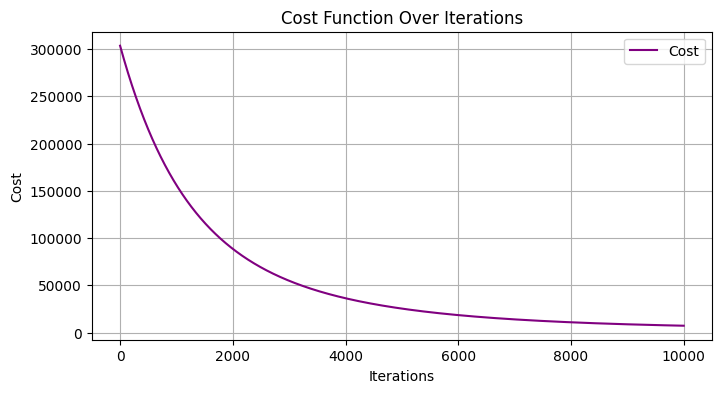

In [4]:
# SECTION 4: Plot cost history over iterations
plt.figure(figsize=(8, 4))
plt.plot(range(iterations), cost_history, label="Cost", color="purple")
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.legend()
plt.show()
